# データの読み込み

In [12]:
%matplotlib inline
import numpy
import pandas
import seaborn

In [13]:
df = pandas.read_csv('housing.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

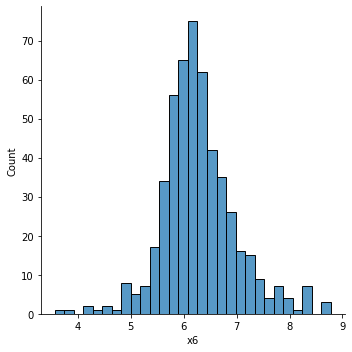

In [15]:
# 分布の確認
seaborn.displot(X['x6'])

# 外れ値除去(3σ法)

In [16]:
col = 'x6'

In [19]:
mean = df.mean()
mean[col]

6.284634387351779

In [21]:
# 標準偏差 Standard deviation
sigma = df.std()
sigma[col]

0.7026171434153233

In [22]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105809

In [23]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597748

In [28]:
# low ～ highに絞り込む。[]の中に条件式を埋め込める。
std_df = df[(low < df[col]) & (df[col] < high)]

In [32]:
f'{len(std_df)}, {len(df)}'

'498, 506'

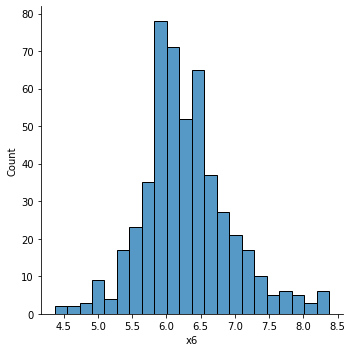

In [33]:
# 分布の確認
seaborn.displot(std_df['x6'])

# 外れ値除去(3σ法) 全カラムに適用後、重回帰分析を行う

In [48]:
_df = df
for col in _df.columns:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(low < _df[col]) & (_df[col] < high)]    

In [49]:
f'{len(_df)}, {len(df)}'

'415, 506'

## 入力と出力に分離

In [50]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

## 訓練データと検証データに分離

In [51]:
from sklearn.model_selection import train_test_split
# test_sizeは検証データの割合、random_stateはなんでもよい。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## 重回帰分析

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
# モデルの学習（訓練データ）
model.fit(X_train, y_train)
# モデルの検証（検証データ）
model.score(X_test, y_test)

0.6253776004329589

3σ法を使って外れ値をクレンジングしたにも関わらず、値が悪くなってしまった。
これを、`過学習`という。

In [54]:
# モデルの検証（訓練データも併せて検証するのがよい）
model.score(X_train, y_train)

0.7972109224535133

# スケーリング

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# scalerの宣言
scaler = StandardScaler()

In [59]:
# scalernの学習（平均と標準偏差）
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train_2 = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test)

In [ ]:
# モデルの宣言
model = LinearRegression()

In [65]:
# モデルの学習（訓練データ）
model.fit(X_train_2, y_train)
# モデルの検証（検証データ）
model.score(X_test_2, y_test)

0.6253776004329595

In [67]:
# モデルの検証（訓練データも併せて検証するのがよい）
model.score(X_train_2, y_train)

0.7972109224535133

In [71]:
numpy.set_printoptions(precision=3, suppress=True)  # 指数関数での表示が禁止され、見やすくなる。

# 重みの確認（スケーリングした後は、重みwで、どのパラメータが重要かわかる）
model.coef_

array([-0.195,  0.212,  0.508, -0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

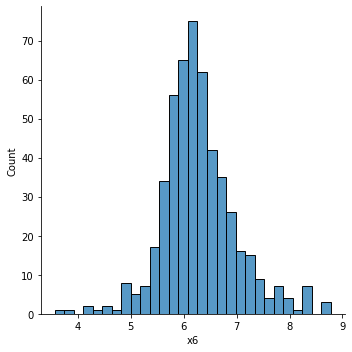

In [79]:
# 重みが大きいxは、正規分布に近いグラフになっている。
seaborn.displot(_def['x6'])